### Install Required Libraries

In [1]:
# !pip install numpy
# !pip install matplotlib

### Task 1: Import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import matplotlib.pyplot as plt

### Task 2: Import Dataset:

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### 2.1 Data Preprocessing

In [11]:
# Check Data shape and value range
print(train_images.shape)
print("Minimum value: {}, Maximum Value: {}".format(train_images.max(), train_images.min()))
# train_images[0]

(60000, 28, 28)
Minimum value: 255, Maximum Value: 0


In [12]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
print("Before:",train_labels)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("After:", train_labels)

Before: [9 0 0 ... 3 0 5]
After: [[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
train_labels[1].argmax()

0

In [20]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [21]:
print(test_images.shape, test_labels.shape)

(10000, 28, 28, 1) (10000, 10)


In [22]:
print("Minimum value: {}, Maximum Value: {}".format(train_images.max(), train_images.min()))

Minimum value: 1.0, Maximum Value: 0.0


Now data ranges between 0-1 float values. Let's check class labels

In [23]:
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

As we can see above, labels are in numerical/categorical form, we can map them to the string labels, here is the python dictionary for the same:

In [24]:
labels_dict = {0: "T-shirt/top",    1: "Trouser",    2: "Pullover",    3: "Dress",4: "Coat",5: "Sandal",6: "Shirt",7: "Sneaker",8: "Bag",9: "Ankle boot"}

As shown above, we have 60000 images for training and 10000 images for testing. Let's test any data sample to check if it is corect data or not

Actual Label:  0
Mapped Label T-shirt/top


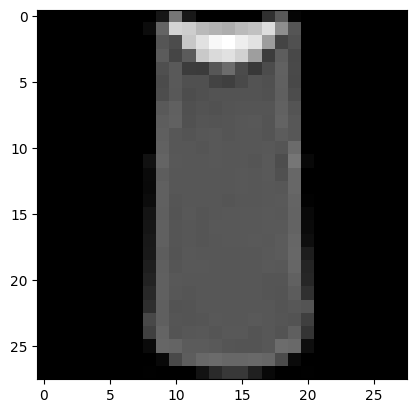

In [29]:
print("Actual Label: ", train_labels[2].argmax())
print("Mapped Label", labels_dict[train_labels[2].argmax()])
plt.imshow(train_images[2], cmap='gray')

### Task 3: Build a Classifier using MLP (Multi Layer perceptron)

In [30]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 10938

### Task 4: Compile the Model

In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Task 5: Train and Test the model.

- Feed the training data to the built model

In [34]:
batch_size = 128
history = model.fit(train_images, train_labels, epochs=15, batch_size=batch_size)

Epoch 1/15
469/469 [==============================] - 9s 14ms/step - loss: 0.9062 - accuracy: 0.6769
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.5973 - accuracy: 0.7908
Epoch 3/15
469/469 [==============================] - 8s 17ms/step - loss: 0.5324 - accuracy: 0.8148
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 0.5040 - accuracy: 0.8259
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.4814 - accuracy: 0.8320
Epoch 6/15
469/469 [==============================] - 7s 15ms/step - loss: 0.4633 - accuracy: 0.8383
Epoch 7/15
469/469 [==============================] - 7s 15ms/step - loss: 0.4585 - accuracy: 0.8413
Epoch 8/15
469/469 [==============================] - 7s 15ms/step - loss: 0.4468 - accuracy: 0.8441
Epoch 9/15
469/469 [==============================] - 6s 12ms/step - loss: 0.4379 - accuracy: 0.8452
Epoch 10/15
469/469 [==============================] - 6s 13ms/step - loss: 0.4317 - accura

### Model Evaluation

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.3670 - accuracy: 0.8728


In [36]:
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

Test Loss:  0.36701545119285583
Test Accuracy:  0.8727999925613403


- Access Loss and Accuracy details from the training history

In [37]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

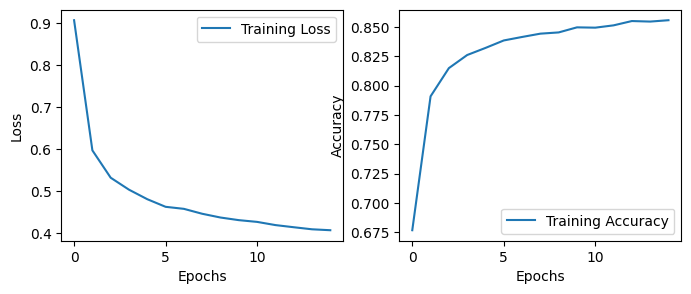

In [38]:
# Create subplots for loss and accuracy
plt.figure(figsize=(8, 3))
# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- As we can see in the graph, loss has been decreased with each epoch where accuracy has been increased

### Let's make predictions on the test test and check whether those predictions are correct or not

In [46]:
model.predict(test_images)[10].argmax()

313/313 [==============================] - 2s 6ms/step


4

In [47]:
test_labels[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [48]:
test_labels[10].argmax()

4

- Ask model to make predictions about a test set

In [49]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


- Verify that the predictions match the labels from the test labels

### EVALUATION

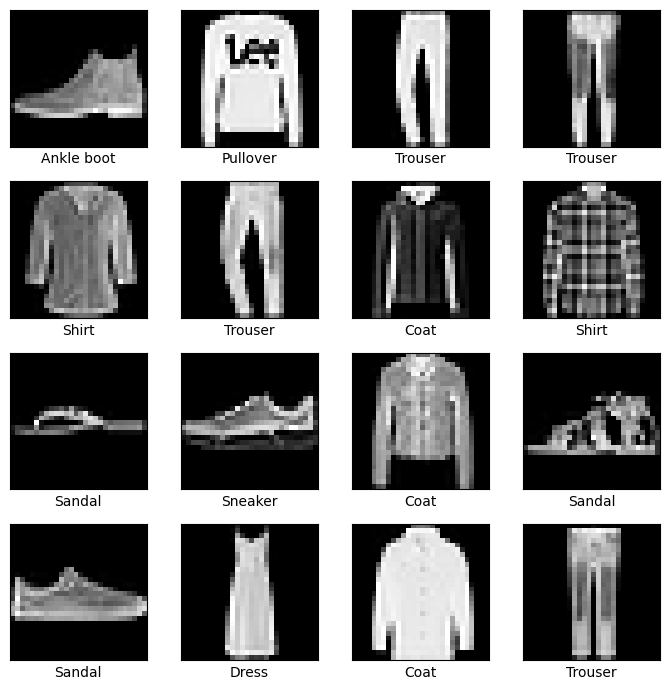

In [50]:

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(7, 7))

# Assuming you have defined labels_dict and predictions earlier
c = 0
for i in range(4):
    for j in range(4):
        prediction = predictions[c].argmax()
        axes[i, j].imshow(test_images[c], cmap='gray')  # Assuming the images are grayscale
        axes[i, j].set_xlabel(str(labels_dict[prediction]))
        axes[i, j].set_xticks([])  # Hide the x-axis scale and ticks
        axes[i, j].set_yticks([])  # Hide the y-axis scale and ticks
        c += 1

plt.tight_layout()  # Adjust spacing between subplots
plt.show()